In [2]:
# remember to put this line in your notebook, otherwise the visualization won't show up
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.0f}'.format

import statsmodels.formula.api as sm
import dateutil

Populating the interactive namespace from numpy and matplotlib


In [3]:
# abstract2012 = pd.read_csv("/home/jovyan/Yandex.Disk/BigDataPubPol/data/abstracts/FedRePORTER_PRJABS_C_FY2012.csv", 
#                  encoding='utf-8', skipinitialspace=True, low_memory=False)
# abstract2012.head()

In [4]:
# patents2012 = pd.read_csv("/home/jovyan/Yandex.Disk/BigDataPubPol/data/patents/patents_2012.csv", 
#                  encoding='utf-8', skipinitialspace=True, low_memory=False)
# patents2012.head()

In [5]:
# fedrep2012 = pd.read_csv("/home/jovyan/Yandex.Disk/BigDataPubPol/data/projects/FedRePORTER_PRJ_C_FY2012.csv", 
#                  encoding='utf-8', skipinitialspace=True, low_memory=False)
# fedrep2012.head(3)

In [6]:
# print(fedrep2012['ORGANIZATION_COUNTRY'].unique())
# print((fedrep2012[fedrep2012['ORGANIZATION_COUNTRY'] == 'UNITED STATES']
#        ['ORGANIZATION_STATE'].unique()))
# fedrep2012['PROJECT_START_DATE'] = pd.to_datetime(fedrep2012['PROJECT_START_DATE'])

In [7]:
## Prepping data to be used for analysis
fedrep = pd.DataFrame()
for year in range(2012, 2019):
    temp = pd.read_csv("/home/jovyan/Yandex.Disk/BigDataPubPol/data/projects/FedRePORTER_PRJ_C_FY{}.csv".format(year), 
                 encoding='utf-8', skipinitialspace=True, low_memory=False)
    
    temp = temp[(temp['ORGANIZATION_COUNTRY'] == 'UNITED STATES')
               ][
        ["CONGRESSIONAL_DISTRICT", "ORGANIZATION_STATE","FY", "FY_TOTAL_COST"]].groupby(
        ["CONGRESSIONAL_DISTRICT","ORGANIZATION_STATE", "FY"], as_index=False).sum()
   
    temp["CONGRESSIONAL_DISTRICT"] = pd.to_numeric(temp["CONGRESSIONAL_DISTRICT"])
    temp["FY_TOTAL_COST"] = pd.to_numeric(temp["FY_TOTAL_COST"])

    fedrep = fedrep.append(temp)

fedrep.head()

,CONGRESSIONAL_DISTRICT,ORGANIZATION_STATE,FY,FY_TOTAL_COST
0,0,AK,2012,68812110
1,0,AR,2012,564009
2,0,AS,2012,920593
3,0,CA,2012,2271548
4,0,CO,2012,495204


In [8]:
print("Q1: I'm planning on using the **FedReporter** Data to use Fiscal Year Total Cost "
      "as a measure of funding received in each state and congressional district")

print("Sample size after filtering and grouping: ", len(fedrep))

Q1: I'm planning on using the **FedReporter** Data to use Fiscal Year Total Cost as a measure of funding received in each state and congressional district
Sample size after filtering and grouping:  3253


In [9]:
print("Q2: The following are the columns of data I plan on using to " 
      "group on, filter, and later analyze on: \n{}".format(
          ["CONGRESSIONAL_DISTRICT", "ORGANIZATION_STATE","FY", "FY_TOTAL_COST"]))

print("\nCharacteristics of the data: ")
print("There are {} (too many) distinct states: \n".format(len(fedrep["ORGANIZATION_STATE"].unique())),
      fedrep["ORGANIZATION_STATE"].unique())
print("There are {} distinct number of congressional districts: \n".format(len(fedrep["CONGRESSIONAL_DISTRICT"].unique())), 
      fedrep["CONGRESSIONAL_DISTRICT"].unique())


Q2: The following are the columns of data I plan on using to group on, filter, and later analyze on: 
['CONGRESSIONAL_DISTRICT', 'ORGANIZATION_STATE', 'FY', 'FY_TOTAL_COST']

Characteristics of the data: 
There are 59 (too many) distinct states: 
 ['AK' 'AR' 'AS' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GU' 'HI' 'IA' 'ID' 'KY'
 'MA' 'MD' 'MT' 'ND' 'OH' 'OK' 'PR' 'RI' 'SD' 'VA' 'VI' 'VT' 'WA' 'WY'
 'AL' 'AZ' 'GA' 'IL' 'IN' 'KS' 'LA' 'ME' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE'
 'NH' 'NJ' 'NM' 'NV' 'NY' 'OR' 'PA' 'SC' 'TN' 'TX' 'UT' 'WI' 'WV' 'FM'
 'MP' 'MH' 'PW']
There are 57 distinct number of congressional districts: 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 90. 98. 99.]


In [11]:
print("Q3: Lets look for some outliers:\n")
print("There are {} congressional districts that received a total more than 1 billion USD.".format(
    len(fedrep[fedrep["FY_TOTAL_COST"] > 10**9])))
print(fedrep.nlargest(5, 'FY_TOTAL_COST'))
print("There are {} congressional districts that received less than 1 million USD.".format(
    len(fedrep[fedrep["FY_TOTAL_COST"] < 1000000])))
print(fedrep.nsmallest(5, 'FY_TOTAL_COST'))

print("As we can see, there's a few congressional distrits that received more than 1 billion in research funds "
     "while there are more congressional districts towards the bottom end")

Q3: Lets look for some outliers:

There are 15 congressional districts that received a total more than 1 billion USD.
     CONGRESSIONAL_DISTRICT ORGANIZATION_STATE    FY  FY_TOTAL_COST
236                       7                 MA  2018     2110716674
235                       7                 MA  2017     2043737994
241                       7                 MA  2016     1950632518
252                       7                 MA  2014     1855155118
252                       7                 MA  2015     1830340068
There are 425 congressional districts that received less than 1 million USD.
     CONGRESSIONAL_DISTRICT ORGANIZATION_STATE    FY  FY_TOTAL_COST
19                        0                 OK  2012              0
324                      11                 MA  2012              0
15                        0                 OK  2013              0
245                       7                 CA  2014              0
435                      99                 DC  2017     

In [12]:
print(" Q4: Data Quality Issues: \nCongressional District 0, 98, 99, these shouldn't exist")
print("CD-00: ", len(fedrep[fedrep["CONGRESSIONAL_DISTRICT"] == 0]))
print("CD-99: ", len(fedrep[fedrep["CONGRESSIONAL_DISTRICT"] == 99]))
print("CD-98: ", len(fedrep[fedrep["CONGRESSIONAL_DISTRICT"] == 98]))
print("CD-90: ", len(fedrep[fedrep["CONGRESSIONAL_DISTRICT"] == 90]))
print("As we can see there's a sizeable chunk of records that have a congressional district that makes no sense "
     ", or around {}% of records.".format((152+24+46+10)*100/len(fedrep))
     )

print("These erroneous congress districts represent ${} of total funding from "
      "across all fedReporter data in the shared directory that may not be included for analysis".format(
      sum(fedrep[fedrep["CONGRESSIONAL_DISTRICT"].isin([0,99,98,90])]["FY_TOTAL_COST"])
      ))

 Q4: Data Quality Issues: 
Congressional District 0, 98, 99, these shouldn't exist
CD-00:  152
CD-99:  24
CD-98:  46
CD-90:  10
As we can see there's a sizeable chunk of records that have a congressional district that makes no sense , or around 7.131878266215801% of records.
These erroneous congress districts represent $6990402908.0 of total funding from across all fedReporter data in the shared directory that may not be included for analysis


In [20]:
print("Q5: I plan to merge the FedReporter data with census and congressional data "
     "to add demographic and political data, which will help me advance my research.")
print("\nI plan to do this by joining on Congressional District number as the Census has data tables organized by congressional district thankfully. "
     "\n\nThen I'll do the same for political information (party affiliation, term length, etc.) of each district which should be easily mergeable on Congressional District too"
     )

Q5: I plan to merge the FedReporter data with census and congressional data to add demographic and political data, which will help me advance my research.

I plan to do this by joining on Congressional District number as the Census has data tables organized by congressional district thankfully. 

Then I'll do the same for political information (party affiliation, term length, etc.) of each district which should be easily mergeable on Congressional District too


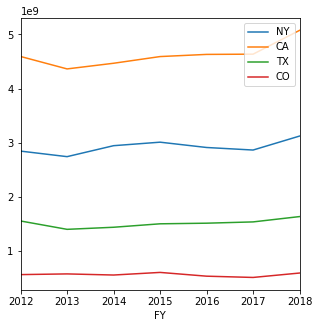

In [23]:
def get_state_summary(fedrep_data, state):
    return fedrep_data[fedrep_data["ORGANIZATION_STATE"] == state][
        ["ORGANIZATION_STATE", "FY", "FY_TOTAL_COST"]].groupby(
        ["ORGANIZATION_STATE", "FY"], as_index=False).sum()

fig, ax = plt.subplots(figsize=(5,5))
for state in ["NY","CA", "TX","CO"]:
    state_sum = get_state_summary(fedrep, state)
    state_sum.plot(kind='line', x='FY', y='FY_TOTAL_COST', ax=ax, label=state)
    
plt.show()

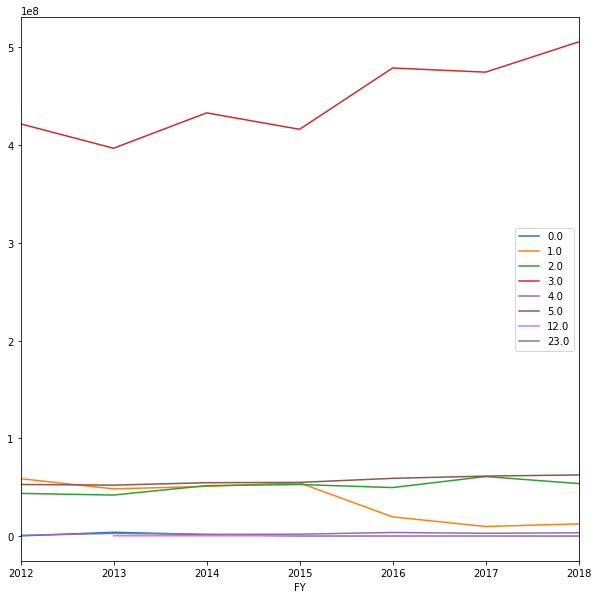

In [24]:
from statsmodels.graphics.regressionplots import abline_plot

def get_district_summary(fedrep_data, state):
    return fedrep_data[fedrep_data["ORGANIZATION_STATE"] == state][
        ["CONGRESSIONAL_DISTRICT", "FY", "FY_TOTAL_COST"]].groupby(
        ["CONGRESSIONAL_DISTRICT","FY"], as_index=False).sum()

temp = get_district_summary(fedrep, "CT")

fig, ax = plt.subplots(figsize=(10,10))
for district in temp["CONGRESSIONAL_DISTRICT"].unique():
    dist_sum = temp[
          (temp["CONGRESSIONAL_DISTRICT"] == district)
#         & (temp["FY_TOTAL_COST"] < 100000000.)
    ]
#     if len(dist_sum):
#         result = sm.ols(formula="FY_TOTAL_COST ~ FY ", data=dist_sum)
#         print("Results {}: {}".format(district, result.params))
    dist_sum.plot(kind='line', x='FY', y='FY_TOTAL_COST', ax=ax, label=district)
#         abline_plot(model_results=model.fit(), ax=ax)

plt.show()

In [25]:
print("Q4: Another data quality concern:\n")
print("Some of these states have congressional district labels that are above the number of actual districts they posses")
print("How can we be sure that those entries with district labels within expected values are indeed correct?")

Q4: Another data quality concern:

Some of these states have congressional district labels that are above the number of actual districts they posses
How can we be sure that those entries with district labels within expected values are indeed correct?
